Candidate Number: 277260

This was prepared by Mert OLCAMAN

# INTRODUCTION

In this assignment, there are 5 different questions that I examined time-complexities of different algorithms such as Cosine Similarity, Jaccard Similarity, Strassen's Method for a dataframe which consists of 20 documents with the number of each word frequencies. The each row in the first column represents each word.

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import math
from numpy.linalg import norm
from scipy.optimize import curve_fit
import sympy as sp

At first, I added all libraries that I used in different part of the notebook.

In [2]:
#reading dataframe
df=pd.read_csv("data2023.csv", index_col=0)

In [3]:
#The function to see how many percent of the calculation is done
# In that way, it can be predicted whether it will take much time with the parameters set
def percentage(i,n):
    percentage_j=(i/len(range(1,n+1)))*100
    if percentage_j %5==0:
        return print("{}% has been completed".format(percentage_j))

I needed to see which value I should specify for iteration as well as the number of rows while processing. So, I couldn't see how many seconds or even minutes a process would take. That's why I added a function which prints how many percent of it was completed so that I could change the parameters without waiting for ending.

In [4]:
#taking logarithm
def log_10(n):
    # if n is integer or a float
    if isinstance(n, (int, float)):
        # if n is 0 or nan
        if n == 0 or math.isnan(n):
            return 0
        # if n is a single value not equal to 0 or not nan
        else:
            return np.log10(n)
    
    # if n is a list
    elif isinstance(n, (list, np.ndarray)):    
        alist = []
        for i in n:
            if i == 0 or math.isnan(i):
                alist.append(0)
            else:
                alist.append(np.log10(i))
        return alist
    else:
        # the remaining inputs like strings
        return float('nan')


There were some problems with logarithm function of numpy library because of some values, so I created a new function which eliminates these kinds of issues.

In [5]:
#Mean calculator of a list
# there were som nan or 0 values, it is added to deal with them
def calculate_mean(a):
    for i in range(len(a)):
        if a[i]==0 or math.isnan(a[i]):
            a[i] = 0
    avg = sum(a) / len(a)
    return avg

Addition to logarithm function, there were some problems with mean calculation in some parts.

In [6]:
#Equations for estimations
def linear(x,c0,c1):
    return c0*x + c1

def quadratic(x,c0,c1,c2):
    return c0*x**2.0 + c1*x + c2

def expon(x,c0,c1):
    return c0 * np.exp(c1 * x)

def cubic(x,c0,c1,c2,c3):
    return c0 * x**3.0 + c1 * x**2.0 + c2* x + c3

While estimating data points for elapsed time, I needed these functions. I added all of them to top in order to see whether I added all.

# QUESTION 1

In the question 1, I examined the time complexity of Cosine Similarity by both my implementation and Numpy implementatin for dot product.

In theoretical, the running time of the algorithm must be O(n)

## The cosine similarity formula:  
$cos\theta = \cfrac{A\cdot B}{\sqrt{A\cdot A}\sqrt{B\cdot B}}$

#### Functions of Cosine Similarity Calculations: (I took them from the lab notebook.)

In [7]:
def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
    if total==0:
        return 0
    else:
        return total

def cosine(v1,v2):
    k=math.sqrt(dot(v1,v1)*dot(v2,v2))
    if dot(v1,v2)==0 or k==0:
        return 0
    else:
        return dot(v1,v2)/k

#### Function of Time and Similarity of Cosine Similarity:

In [8]:
def cosine_sim(df,number_word_cosine=2000,num_iteration_cos=10):
    time_cosine={}
    cosine_dict={}

    for i in range(random_number,random_number+2):
        for j in range(random_number,random_number+2):
            if i!=j and j>i:
                list_total=[]
                for n in range(1,number_word_cosine+1):
                    #taking relevant documents from dataframe
                    first_df=df.iloc[0:n,i-1:i]
                    second_df=df.iloc[0:n,j-1:j]

                    #converting dataframe of doc into array of doc
                    array_first=first_df.values
                    array_second=second_df.values

                    #loop for multiple iteration
                    times=[]
                    for k in range(num_iteration_cos):
                        #starting timer
                        starttime=time.time()
                        #calculation cosine similarity
                        cos=cosine(array_first,array_second)
                        #ending timer
                        endtime=time.time()
                        #calculating elapsed time
                        timetaken=endtime-starttime
                        #adding elapsed time into a list
                        times.append(timetaken)
                        
                    #calculating the average of elapsed times
                    mean=np.mean(times)
                    #list_total.append(list_element)
                    list_total.append([n,mean])
                    
                    #taking the pairs as string to add keys to the dictionary
                    a=str(i)+'-'+str(j)
                    cosine_dict[a]=cos
                    percentage(n,number_word_cosine)
                    
                #time_cosine[a]=(mean,stdev)    
                time_cosine[a]=list_total
                
    return cosine_dict,time_cosine

I returned both similarity of pair dictionary and elapsed time dictionary from the function above.

In [9]:
#Generating a random number to take a pair of consecutive documents
random_number=random.randint(1,20)
random_number=17 #to get random pairs make this line comment

In [10]:
cos_similarities_dict,time_cosine=cosine_sim(df,number_word_cosine=2000,num_iteration_cos=10)

5.0% has been completed
10.0% has been completed
15.0% has been completed
20.0% has been completed
25.0% has been completed
30.0% has been completed
35.0% has been completed
40.0% has been completed
45.0% has been completed
50.0% has been completed
60.0% has been completed
65.0% has been completed
70.0% has been completed
75.0% has been completed
80.0% has been completed
85.0% has been completed
90.0% has been completed
95.0% has been completed
100.0% has been completed


The number of rows, in other words the number of words checked similarities by, were chosen as 2000. The number of iteration was chosen as 10. Otherwise, it would take much time. However, I wanted keep the accuracy higher in terms of similarities by taking high number of rows.

In [11]:
def sim_between_pair(adict):    
    for (i,j) in zip(adict.keys(),adict.values()):
        pair=i
        pair_similarity=j[0]
    print("Similarity between the pair of {}: {:.3f}".format(pair,pair_similarity))
    return pair,pair_similarity

In [12]:
cosine_pair,cosine_pair_similarity=sim_between_pair(cos_similarities_dict)

Similarity between the pair of 17-18: 0.826


In [13]:
#normally the data which comes out from the function called "cosine_sim" was stored in a dictionary
#so I needed to take them to the lists
number_cos=[]
time_cos=[]

#taking data from dictionary into different lists to make the other operations possible        
for i in time_cosine[cosine_pair]:
    number_cos.append(i[0])
    time_cos.append(i[1])

The time values were in the dictionary to see one by one according to the number of words which were taken from dataframe, so I needed to extract them from dictionary to a list as well as the number of words.

### Key Constant Calculations: I found all of the parameters of estimated equation

In [14]:
def slope_intercept(x,y,a,b):
    initial=[a,b]
    params, covariance = curve_fit(linear,x,y, p0=initial)
    slope,intercept=params
    return slope,intercept

In [15]:
def slope_intercept_print(x,y,a,b,similarity,log=False):
    if log:
        a_str=" Logarithmic"
    else:
        a_str=""
    slope,intercept=slope_intercept(x,y,a,b)
    print("Key Values for"+a_str+" "+similarity+" Similarity:")
    print("------------------------------------")
    print("Slope: {}".format(slope))
    print("Intercept: {}".format(intercept))
    return slope,intercept

In [16]:
#0.1 and 0.5 were initial predicting values 
cos_key_values=slope_intercept_print(number_cos,time_cos,0.1,0.5,similarity="Cosine",log=False)

Key Values for Cosine Similarity:
------------------------------------
Slope: 6.075828400794737e-06
Intercept: 0.00027764973068626435


In [17]:
#calculating linear estimated y values to check whether slope and intercept were found correctly
def linear_estimated_values(x,slope,intercept):
    estimated_y_values=slope*(np.array(x)) + intercept
    return estimated_y_values

In [18]:
#linear estimated y values
cos_estimated_y=linear_estimated_values(number_cos,cos_key_values[0],cos_key_values[1])

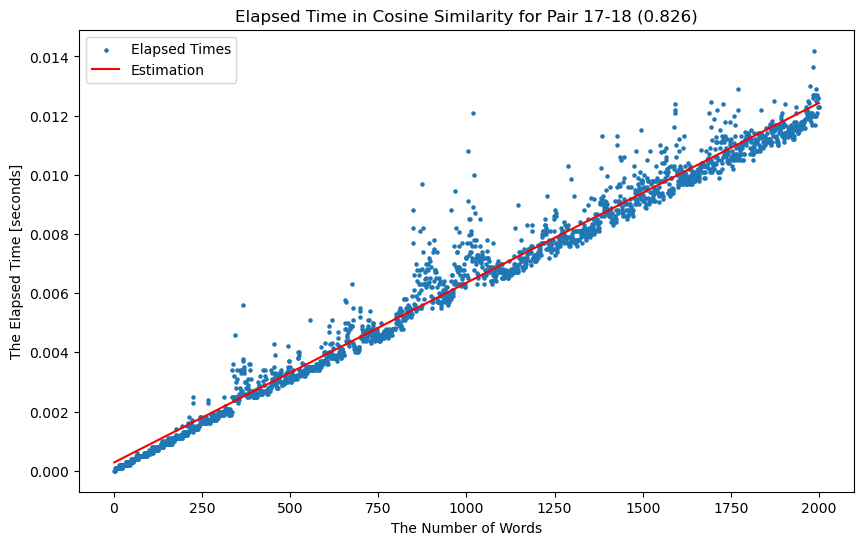

In [19]:
#plotting actual data points and estimated linear equation
plt.figure(figsize=(10, 6))
plt.scatter(number_cos,time_cos,s=5, label="Elapsed Times")
plt.plot(number_cos,cos_estimated_y, color='red',label="Estimation")
plt.xlabel("The Number of Words")
plt.ylabel("The Elapsed Time [seconds]")
plt.title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
plt.legend()
plt.show()

In [205]:
#Finding alpha value by estimation
def alpha_est_eq_linear(x, alpha, c0, c1):
    return c0 * x**alpha + c1

def alpha_estimation_linear(x,y,alpha,c0,c1):
    # Initial guess for parameters
    initial = [alpha,c0,c1]
    # curve fitting to find optimal parameters
    parameters, covariance = curve_fit(alpha_est_eq_linear, x, y, p0=initial)
    #take the alpha value from the parameters
    alpha_opt = parameters[0]
    print("The alpha value:", alpha_opt)
    return alpha_opt

### Alpha Value:

In [21]:
alpha_cos=alpha_estimation_linear(number_cos,time_cos,1,cos_key_values[0],cos_key_values[1])

The alpha value: 0.8888964235330838


According to the alpha value the time complexity of it is $O(n^{0.88})$, closer to $O(n)$ (expected value). So, the elapsed time depends on the number of the words taken into account in a linear way.

### Estimation Equation:

In [22]:
print("The equation is: {}x^{:.3f} + {}".format(cos_key_values[0],alpha_cos,cos_key_values[0]))

The equation is: 6.075828400794737e-06x^0.889 + 6.075828400794737e-06


The equation of the estimated curve can be seen above. With this equation, the prediction model can be created and the calculations how many minutes would it take with more words can be made.

### Logarithmic Cosine

In [23]:
#taking the logaritm of each value in 2 lists and adding them into the different lists
def log10_time_list(alist,pair):
    x=[]
    y=[]
    for i in alist[pair]:
        x.append(log_10(i[0]))
        y.append(log_10(i[1]))
    return x,y

In [24]:
number_cos_log,time_cos_log=log10_time_list(time_cosine,cosine_pair)

#the functions below have already been written in the previous part, about slope and intercept
cos_key_values_log=slope_intercept_print(number_cos_log,time_cos_log,0.1,0.5,similarity="Cosine",log=True)
cos_estimated_logy=linear_estimated_values(number_cos_log,cos_key_values_log[0],cos_key_values_log[1])

Key Values for Logarithmic Cosine Similarity:
------------------------------------
Slope: 0.8616973642941531
Intercept: -4.786599611425822


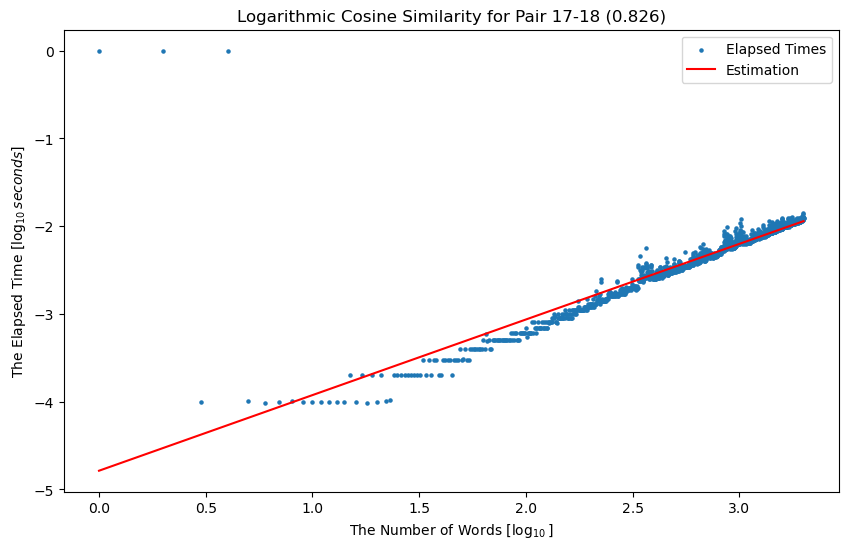

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(number_cos_log,time_cos_log,s=5, label="Elapsed Times")
plt.plot(number_cos_log,cos_estimated_logy, color='red',label="Estimation")
plt.xlabel("The Number of Words [$\log_{10}$]")
plt.ylabel("The Elapsed Time [$\log_{10}seconds$]")
plt.title("Logarithmic Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
plt.legend()
plt.show()

### Combining the Results for Cosine and Logarithmic Cosine in Subplots

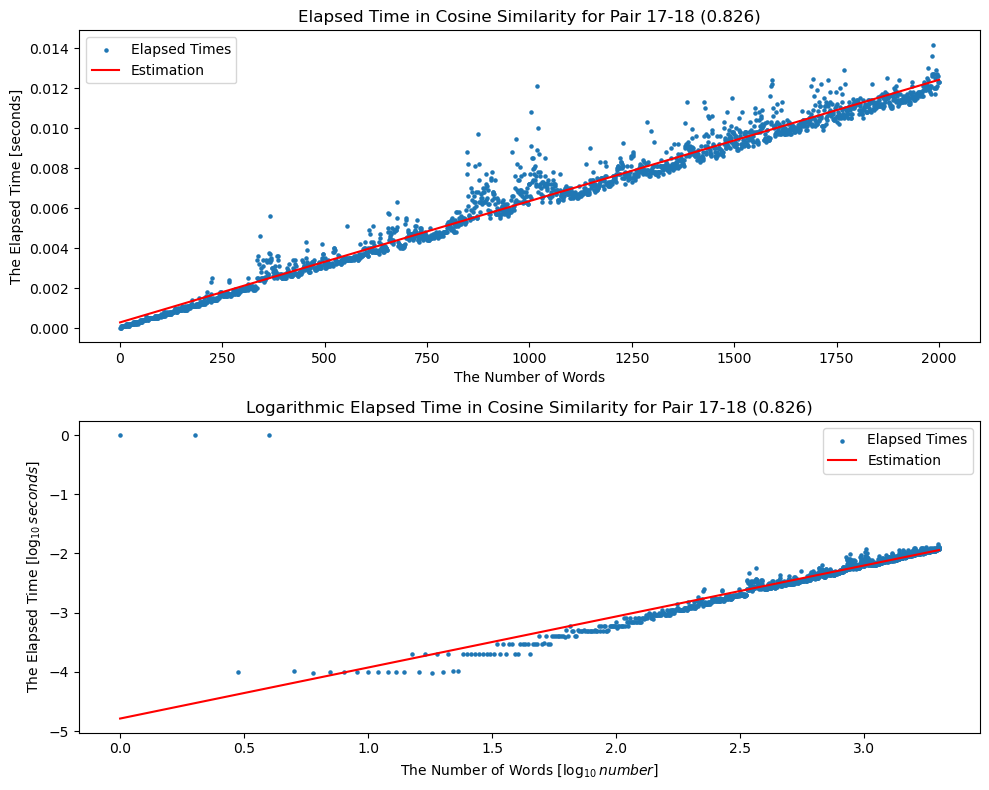

In [26]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot on the first subplot (top)
axs[0].scatter(number_cos,time_cos,s=5, label="Elapsed Times")
axs[0].plot(number_cos,cos_estimated_y, color='red',label="Estimation")
axs[0].set_title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
axs[0].set_xlabel("The Number of Words")
axs[0].set_ylabel("The Elapsed Time [seconds]")
axs[0].legend()


# Plot on the second subplot (bottom)
axs[1].scatter(number_cos_log,time_cos_log,s=5, label="Elapsed Times")
axs[1].plot(number_cos_log,cos_estimated_logy, color='red',label="Estimation")
axs[1].set_title("Logarithmic Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
axs[1].set_xlabel("The Number of Words [$\log_{10}number$]")
axs[1].set_ylabel("The Elapsed Time [$\log_{10}seconds$]")
axs[1].legend()
# Add a common x-axis label
#fig.supxlabel('x-axis')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

### Function of Cosine Similarity (wity Numpy):

Instead of using dot function here, the dot function of the library called Numpy was used [np.dot]

In [27]:
def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
    if total==0:
        return 0
    else:
        return total

def numpy_cosine(v1,v2):
    k1=math.sqrt(np.dot(v1, v1))
    k2=math.sqrt(np.dot(v2, v2))
    if np.dot(v1,v2)==0 or k1==0 or k2==0:
        return 0
    else:
        return np.dot(v1,v2)/(k1*k2)

In [28]:
def cosine_sim_numpy(number_word_cosine=2000,num_iteration_cos=10):
    time_cosine_numpy={}
    cosine_dict_numpy={}

    for i in range(random_number,random_number+2):
        for j in range(random_number,random_number+2):
            if i!=j and j>i:
                list_total=[]
                for n in range(1,number_word_cosine+1):
                    #taking relevant documents from dataframe one by one
                    first_df=df.iloc[0:n,i-1:i]
                    second_df=df.iloc[0:n,j-1:j]

                    #converting dataframe of doc into array of doc
                    array_first=first_df.values.flatten()
                    array_second=second_df.values.flatten()

                    #loop for multiple iteration
                    times=[]
                    for k in range(num_iteration_cos):
                        #starting timer
                        starttime=time.time()
                        #calculation cosine similarity
                        cos_numpy=numpy_cosine(array_first,array_second)
                        #ending timer
                        endtime=time.time()
                        #calculating elapsed time
                        timetaken=endtime-starttime
                        #adding elapsed time into a list
                        times.append(timetaken)
                        
                    #calculating the average of elapsed times
                    mean=np.mean(times)
                    #list_total.append(list_element)
                    list_total.append([n,mean])
                    
                    #taking the pairs as string to add keys to the dictionary
                    a=str(i)+'-'+str(j)
                    cosine_dict_numpy[a]=np.array([cos_numpy])
                    percentage(n,number_word_cosine)
                    
                #time_cosine[a]=(mean,stdev)    
                time_cosine_numpy[a]=list_total
                
    return cosine_dict_numpy,time_cosine_numpy

The same data formats were preserved here as well like in the cosine similarity.

In [29]:
cosine_dict_numpy,time_cosine_numpy=cosine_sim_numpy(number_word_cosine=2000,num_iteration_cos=2000)

5.0% has been completed
10.0% has been completed
15.0% has been completed
20.0% has been completed
25.0% has been completed
30.0% has been completed
35.0% has been completed
40.0% has been completed
45.0% has been completed
50.0% has been completed
60.0% has been completed
65.0% has been completed
70.0% has been completed
75.0% has been completed
80.0% has been completed
85.0% has been completed
90.0% has been completed
95.0% has been completed
100.0% has been completed


Because of being able to calculated in a really shorter time, the number of iteration was increased to 2000. In this way, I could get better graphs and more reliable time values from the calculation.

In [30]:
#the function was written in the previous part
cosine_pair_numpy,cosine_pair_similarity_numpy=sim_between_pair(cosine_dict_numpy)

Similarity between the pair of 17-18: 0.826


In [31]:
#normally the data which comes out from the function called "cosine_sim" was stored in a dictionary
#so I needed to take them to the lists
number_cos_numpy=[]
time_cos_numpy=[]

#taking data from dictionary into different lists to make the other operations possible        
for i in time_cosine_numpy[cosine_pair_numpy]:
    number_cos_numpy.append(i[0])
    time_cos_numpy.append(i[1])

### Key Constant Calculations

In [32]:
#0.1 and 0.5 were initial predicting values
#the function was added in the previous part
cos_key_values_numpy=slope_intercept_print(number_cos_numpy,time_cos_numpy,0.1,0.5,similarity="Cosine (with Numpy)",log=False)

Key Values for Cosine (with Numpy) Similarity:
------------------------------------
Slope: 2.0144738274006464e-09
Intercept: 6.5275429392326806e-06


In [33]:
#linear estimated y values
cos_estimated_y_numpy=linear_estimated_values(number_cos_numpy,cos_key_values_numpy[0],cos_key_values_numpy[1])

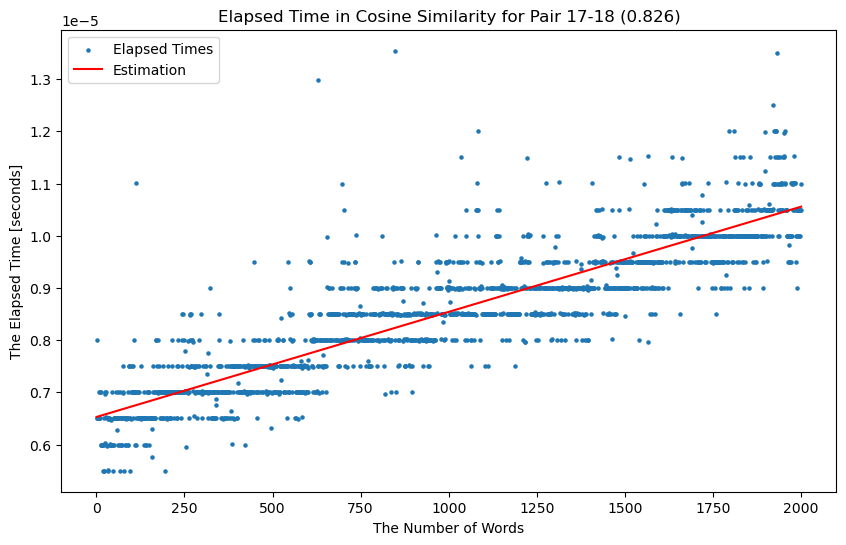

In [34]:
#plotting actual data points and estimated linear equation
plt.figure(figsize=(10, 6))
plt.scatter(number_cos_numpy,time_cos_numpy,s=5, label="Elapsed Times")
plt.plot(number_cos_numpy,cos_estimated_y_numpy, color='red',label="Estimation")
plt.xlabel("The Number of Words")
plt.ylabel("The Elapsed Time [seconds]")
plt.title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair_numpy,cosine_pair_similarity_numpy))
plt.legend()
plt.show()

### Alpha Value:

In [35]:
alpha_cos_numpy=alpha_estimation_linear(number_cos_numpy,time_cos_numpy,1,cos_key_values_numpy[0],cos_key_values_numpy[1])

The alpha value: 0.8689742424359317


(Note:The function added in the previous section was used here directly.)

According to the alpha value the time complexity of it is $O(n^{0.87})$, closer to $O(n)$ (expected value). So, the elapsed time depends on the number of the words taken into account in a linear way.


### Estimation Equation:

In [36]:
print("The equation is: {}x^{:.3f} + {}".format(cos_key_values_numpy[0],alpha_cos_numpy,cos_key_values_numpy[0]))

The equation is: 2.0144738274006464e-09x^0.869 + 2.0144738274006464e-09


### The Logarithmic Cosine (with Numpy)

In [37]:
number_cos_log_numpy,time_cos_log_numpy=log10_time_list(time_cosine_numpy,cosine_pair_numpy)

#the functions below have already been written in the previous part, about slope and intercept
cos_key_values_log_numpy=slope_intercept_print(number_cos_log_numpy,time_cos_log_numpy,0.1,0.5,similarity="Cosine(with Numpy)",log=True)
cos_estimated_logy_numpy=linear_estimated_values(number_cos_log_numpy,cos_key_values_log_numpy[0],cos_key_values_log_numpy[1])

Key Values for Logarithmic Cosine(with Numpy) Similarity:
------------------------------------
Slope: 0.12866161352673622
Intercept: -5.442635098896805


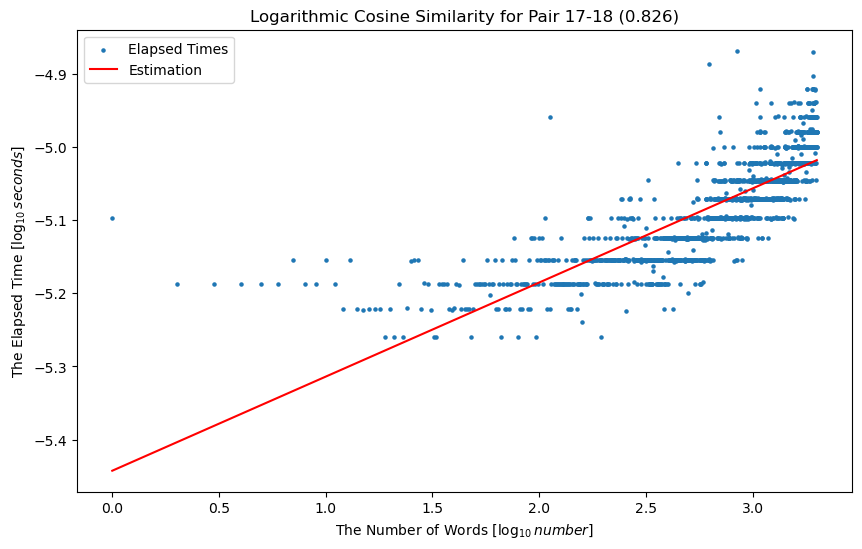

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(number_cos_log_numpy,time_cos_log_numpy,s=5, label="Elapsed Times")
plt.plot(number_cos_log_numpy,cos_estimated_logy_numpy, color='red',label="Estimation")
plt.xlabel("The Number of Words [$\log_{10}number$]")
plt.ylabel("The Elapsed Time [$\log_{10}seconds$]")
plt.title("Logarithmic Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
plt.legend()
plt.show()

### Combining the Results for Cosine (with Numpy) and Logarithmic Cosine (with Numpy) in Subplots

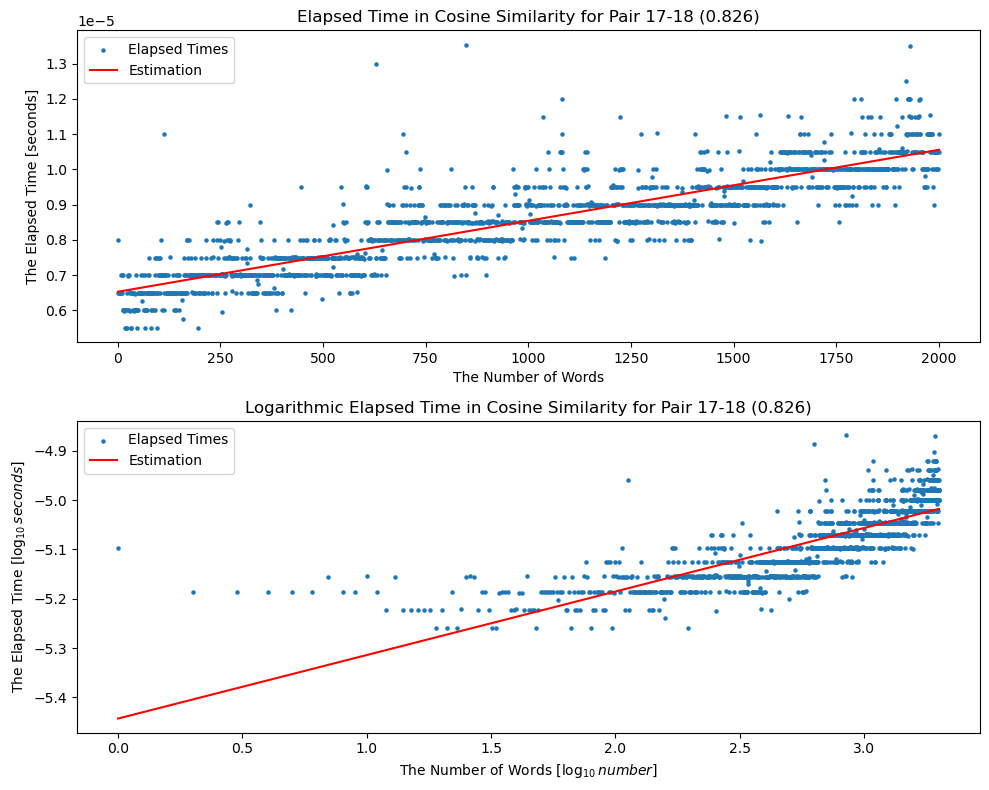

In [39]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot on the first subplot (top)
axs[0].scatter(number_cos_numpy,time_cos_numpy,s=5, label="Elapsed Times")
axs[0].plot(number_cos_numpy,cos_estimated_y_numpy, color='red',label="Estimation")
axs[0].set_title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair_numpy,cosine_pair_similarity_numpy))
axs[0].set_xlabel("The Number of Words")
axs[0].set_ylabel("The Elapsed Time [seconds]")
axs[0].legend()


# Plot on the second subplot (bottom)
axs[1].scatter(number_cos_log_numpy,time_cos_log_numpy,s=5, label="Elapsed Times")
axs[1].plot(number_cos_log_numpy,cos_estimated_logy_numpy, color='red',label="Estimation")
axs[1].set_title("Logarithmic Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair_numpy,cosine_pair_similarity_numpy))
axs[1].set_xlabel("The Number of Words [$\log_{10}number$]")
axs[1].set_ylabel("The Elapsed Time [$\log_{10}seconds$]")
axs[1].legend()
# Add a common x-axis label
#fig.supxlabel('x-axis')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

### Comparing Cosine Similarity with Normal and Numpy Implementation

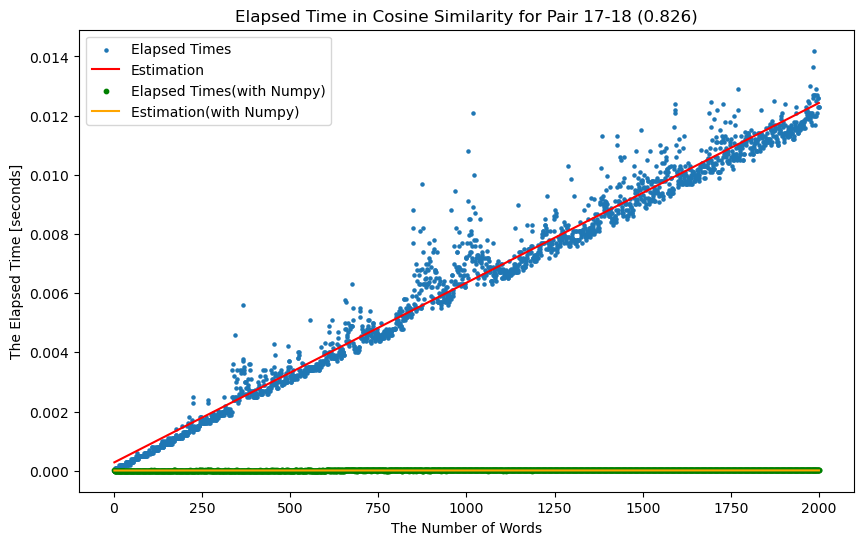

In [40]:
plt.figure(figsize=(10, 6))

#plotting actual data points and estimated linear equation
plt.scatter(number_cos,time_cos,s=5, label="Elapsed Times")
plt.plot(number_cos,cos_estimated_y, color='red',label="Estimation")
plt.title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair,cosine_pair_similarity))
plt.xlabel("The Number of Words")
plt.ylabel("The Elapsed Time [seconds]")
plt.legend()

plt.scatter(number_cos_numpy,time_cos_numpy,s=10,color='green',label="Elapsed Times(with Numpy)")
plt.plot(number_cos_numpy,cos_estimated_y_numpy, color='orange',label="Estimation(with Numpy)")
plt.title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair_numpy,cosine_pair_similarity_numpy))
plt.xlabel("The Number of Words")
plt.ylabel("The Elapsed Time [seconds]")
plt.legend()

plt.show()

According to the graph above, It's obvious that the calculation of cosine similarity with numpy implementation can be performed in a really fast way compared to that of without numpy.

Even though the elapsed time for numpy-implemented-cosine similarity metric is not 0, it seems like 0 here, because of the huge difference between them.

When cosine similarity is desired to calculate for each pair, using dot product calculated by numpy library is a must.

# QUESTION 2: Jaccard Similarity

## Jaccard Similarity Formula:
$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

#### Functions of Jaccard Similarity Calculations: (I took them from the lab notebook.)

In [41]:
def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
    intersectiontot=maketotal(intersection)
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union

In [42]:
def jaccard_sim(number_word_jac=2000,number_of_iteration_j=10):
    time_jaccard={}
    jaccard_dict={}

    for i in range(random_number,random_number+2):
        for j in range(random_number,random_number+2):
            if i!=j and j>i:
                list_total=[]
                for n in range(1,number_word_jac+1):
                    #taking relevant documents from dataframe one by one
                    first_df=df.iloc[0:n,i-1:i]
                    second_df=df.iloc[0:n,j-1:j]

                    #converting dataframe of doc into array of doc
                    array_first=first_df.values
                    array_second=second_df.values
                    
                    #converting the values in array into a dictionary with a loop
                    dict_first = {i: value[0] for i, value in enumerate(array_first)}
                    dict_second = {i: value[0] for i, value in enumerate(array_second)}
                    
                    #loop for multiple iteration
                    times=[]
                    for k in range(number_of_iteration_j):
                        #starting timer
                        starttime=time.time()
                        #calculation cosine similarity
                        jac=jaccard(dict_first,dict_second)
                        #ending timer
                        endtime=time.time()
                        #calculating elapsed time
                        timetaken=endtime-starttime
                        #adding elapsed time into a list
                        times.append(timetaken)
                        
                    #calculating the average of elapsed times
                    mean=np.mean(times)
                    #list_total.append(list_element)
                    list_total.append([n,mean])
                    
                    #taking the pairs as string to add keys to the dictionary
                    a=str(i)+'-'+str(j)
                    
                    #storing the data in the same way other ones
                    jaccard_dict[a]=np.array([jac])
                    
                    #checking how many percent of it has been completed while working
                    percentage(n,number_word_jac)
                    
                #time_cosine[a]=(n,mean)    
                time_jaccard[a]=list_total
                
    return jaccard_dict,time_jaccard

The data was stored in the same way as other ones here as well.

In [43]:
jac_similarities_dict,time_jaccard_sim=jaccard_sim(number_word_jac=2000,number_of_iteration_j=100)

5.0% has been completed
10.0% has been completed
15.0% has been completed
20.0% has been completed
25.0% has been completed
30.0% has been completed
35.0% has been completed
40.0% has been completed
45.0% has been completed
50.0% has been completed
60.0% has been completed
65.0% has been completed
70.0% has been completed
75.0% has been completed
80.0% has been completed
85.0% has been completed
90.0% has been completed
95.0% has been completed
100.0% has been completed


In [44]:
#the function was written in the previous part
jaccard_pair,jaccard_pair_similarity=sim_between_pair(jac_similarities_dict)

Similarity between the pair of 17-18: 0.407


In [45]:
#normally the data which comes out from the function called "jaccard_sim" was stored in a dictionary
#so I needed to take them to the lists
number_jaccard=[]
time_jaccard=[]

#taking data from dictionary into different lists to make the other operations possible        
for i in time_jaccard_sim[jaccard_pair]:
    number_jaccard.append(i[0])
    time_jaccard.append(i[1])

### Key Constant Calculations

In [46]:
#0.1 and 0.5 were initial predicting values
#the function was added in the previous part
jaccard_key_values=slope_intercept_print(number_jaccard,time_jaccard,0.1,0.5,similarity="Jaccard",log=False)

Key Values for Jaccard Similarity:
------------------------------------
Slope: 4.6043573311165884e-07
Intercept: -5.165391151039761e-06


In [47]:
#linear estimated y values
jaccard_estimated_y=linear_estimated_values(number_jaccard,jaccard_key_values[0],jaccard_key_values[1])

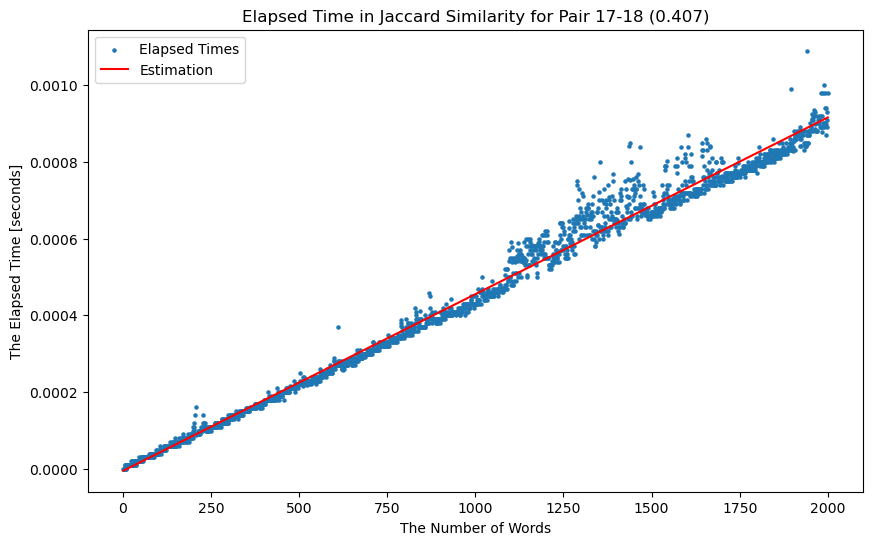

In [48]:
#plotting actual data points and estimated linear equation
plt.figure(figsize=(10, 6))
plt.scatter(number_jaccard,time_jaccard,s=5, label="Elapsed Times")
plt.plot(number_jaccard,jaccard_estimated_y, color='red',label="Estimation")
plt.xlabel("The Number of Words")
plt.ylabel("The Elapsed Time [seconds]")
plt.title("Elapsed Time in Jaccard Similarity for Pair {} ({:.3f})".format(jaccard_pair,jaccard_pair_similarity))
plt.legend()
plt.show()

### Alpha Value:

In [49]:
alpha_jaccard=alpha_estimation_linear(number_jaccard,time_jaccard,1,jaccard_key_values[0],jaccard_key_values[1])

The alpha value: 0.9849994722035567


According to the alpha value the time complexity of it is $O(n^{0.98})$, closer to $O(n)$ (expected value). So, the elapsed time depends on the number of the words taken into account in a linear way.

### Estimation Equation:

In [50]:
print("The equation is: {} x^{:.3f} + {}".format(jaccard_key_values[0],alpha_jaccard,jaccard_key_values[1]))

The equation is: 4.6043573311165884e-07 x^0.985 + -5.165391151039761e-06


### Logarithmic Jaccard

In [51]:
number_jac_log,time_jac_log=log10_time_list(time_jaccard_sim,jaccard_pair)

In [52]:
number_jac_log,time_jac_log=log10_time_list(time_jaccard_sim,jaccard_pair)

#the functions below have already been written in the previous part, about slope and intercept
jaccard_key_values_log=slope_intercept_print(number_jac_log,time_jac_log,0.1,0.5,similarity="Jaccard",log=True)
#the functions below have already been written in the previous part, about estimated key values
jaccard_estimated_logy=linear_estimated_values(number_jac_log,jaccard_key_values_log[0],jaccard_key_values_log[1])

Key Values for Logarithmic Jaccard Similarity:
------------------------------------
Slope: 0.7389839241677519
Intercept: -5.575378534232757


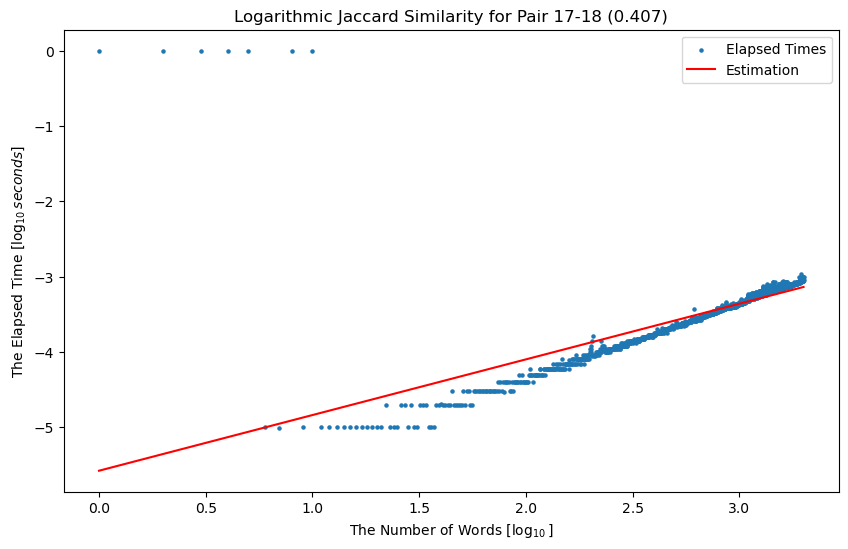

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(number_jac_log,time_jac_log,s=5, label="Elapsed Times")
plt.plot(number_jac_log,jaccard_estimated_logy, color='red',label="Estimation")
plt.xlabel("The Number of Words [$\log_{10}$]")
plt.ylabel("The Elapsed Time [$\log_{10}seconds$]")
plt.title("Logarithmic Jaccard Similarity for Pair {} ({:.3f})".format(jaccard_pair,jaccard_pair_similarity))
plt.legend()
plt.show()

### Combining the Results for Cosine and Logarithmic Cosine in Subplots


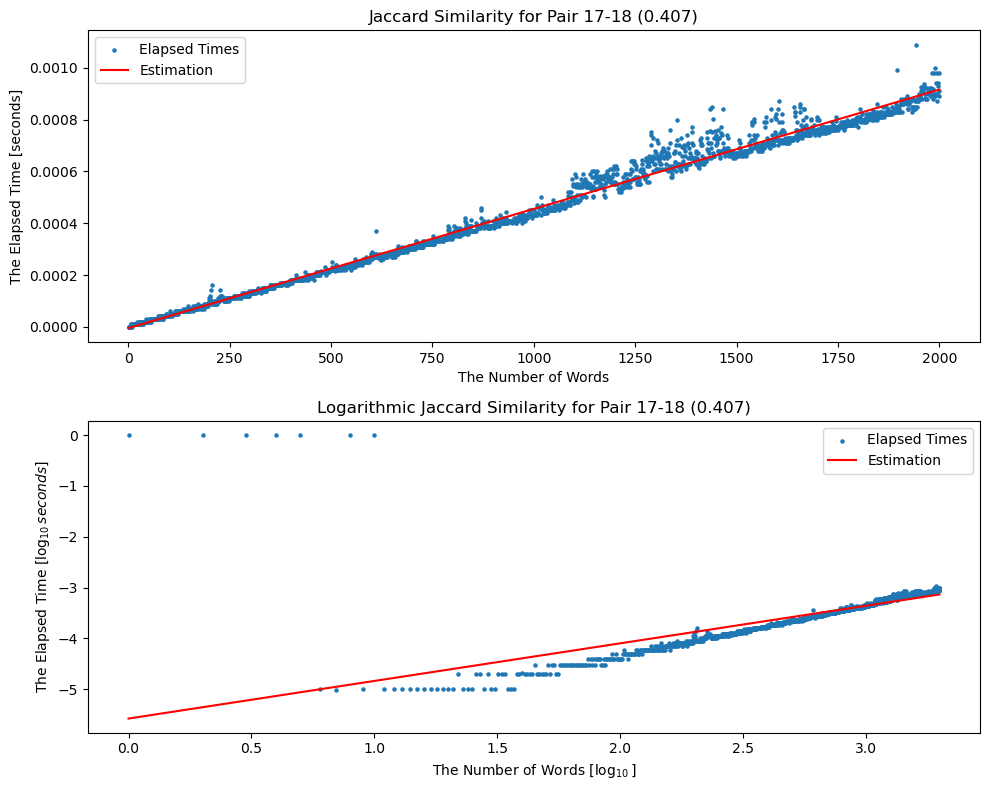

In [54]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# plot of Jaccard Similarity
axs[0].scatter(number_jaccard,time_jaccard,s=5, label="Elapsed Times")
axs[0].plot(number_jaccard,jaccard_estimated_y, color='red',label="Estimation")
axs[0].set_xlabel("The Number of Words")
axs[0].set_ylabel("The Elapsed Time [seconds]")
axs[0].set_title("Jaccard Similarity for Pair {} ({:.3f})".format(jaccard_pair,jaccard_pair_similarity))
axs[0].legend()


# plot of Logarithmic Jacard Similarity
axs[1].scatter(number_jac_log,time_jac_log,s=5, label="Elapsed Times")
axs[1].plot(number_jac_log,jaccard_estimated_logy, color='red',label="Estimation")
axs[1].set_xlabel("The Number of Words [$\log_{10}$]")
axs[1].set_ylabel("The Elapsed Time [$\log_{10}seconds$]")
axs[1].set_title("Logarithmic Jaccard Similarity for Pair {} ({:.3f})".format(jaccard_pair,jaccard_pair_similarity))
axs[1].legend()

# Add a common x-axis label
#fig.supxlabel('x-axis')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

# QUESTION 3: All Pairs Similarity

The expected complexity here was $O(n^{2})$, since all the pairs similarities were calculated to each other. The only way to make it possible is using an inner for loop in another one. In this case, the loop variable iterates $n x n$ times.

Even if I took unique pairs (for example I calculated the time for the pair of 1-2, while I didn't calculated it as for the pair of 2-1 again) to decrease the elapsed time, the time complexity couldnt be changed because of $Total Pair Number = \frac{n \cdot (n + 1)}{2}$ .

The power of n was $O(n^{2})$ here too.




## Jaccard:

In [114]:
def jac_df_converting(df1,df2,range_):
    array1=df1.values
    array2=df2.values
    
    dict1 = dict(zip(range(range_), array1.flatten().tolist()))
    dict2 = dict(zip(range(range_), array2.flatten().tolist()))
    return dict1,dict2

In [115]:
def jac_pair(number_of_documents,num_words,num_iteration_jac):
    times=[]
    for i in range(1,number_of_documents+1):
        for j in range(1,number_of_documents+1):
            if i!=j and j>i:
                
                first_df=df.iloc[:num_words,i-1:i]
                second_df=df.iloc[:num_words,j-1:j]
                
                #converting dataframe to a suitable format which can be used in jaccard calculation
                dict_first,dict_second=jac_df_converting(first_df,second_df,num_words)
                
                time_iterate=[]
                for k in range(num_iteration_jac):
                    #starting timer
                    starttime=time.time()
                    
                    #jaccard similarity calculation
                    jac=jaccard(dict_first,dict_second)
                    
                    #ending timer
                    endtime=time.time()
                    
                    #calculating elapsed time
                    timetaken=endtime-starttime
                    #adding elapsed time into a list
                    time_iterate.append(timetaken)
                
                times.append(np.mean(time_iterate))
                
        all_times=sum(times)
    return all_times

The data was stored in the same way again.

In [116]:
def jaccard_all_pair_sim_time(number_of_documents,number_of_words,number_of_iteration):
    x=[]
    y=[]
    for i in range(1,number_of_documents+1):
        x.append(i)
        y.append(jac_pair(i+1,number_of_words,number_of_iteration))
        percentage(i,number_of_documents)
    return np.array(x),np.array(y)

In [117]:
all_pair_number_jaccard,all_pair_time_jaccard=jaccard_all_pair_sim_time(20,2000,10)

5.0% has been completed
10.0% has been completed
15.0% has been completed
20.0% has been completed
25.0% has been completed
30.0% has been completed
35.0% has been completed
40.0% has been completed
45.0% has been completed
50.0% has been completed
60.0% has been completed
65.0% has been completed
70.0% has been completed
75.0% has been completed
80.0% has been completed
85.0% has been completed
90.0% has been completed
95.0% has been completed
100.0% has been completed


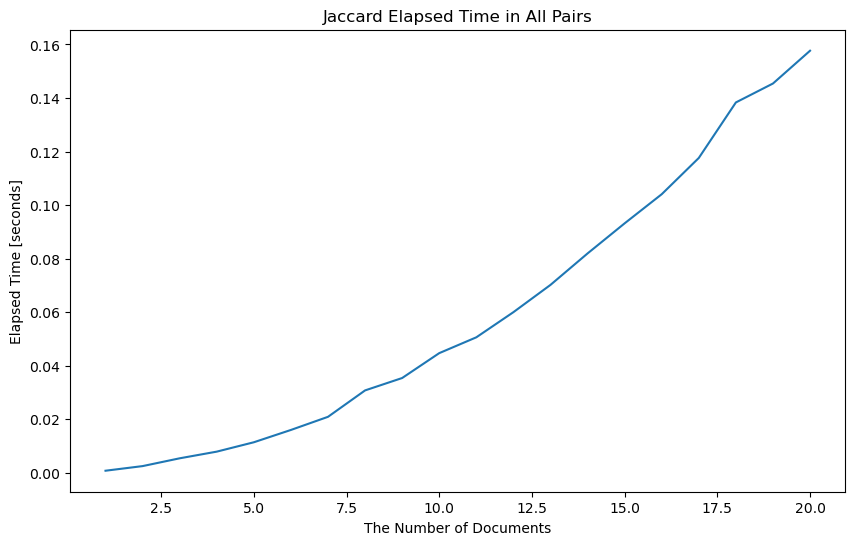

In [118]:
plt.figure(figsize=(10, 6))
plt.title("Jaccard Elapsed Time in All Pairs")
plt.xlabel("The Number of Documents")
plt.ylabel("Elapsed Time [seconds]")
plt.plot(all_pair_number_jaccard,all_pair_time_jaccard)
plt.show()

The function below was taken from the lab notebook of the lecture named "Data Science Research Method".

By using these functions, which curve estimation was better could be seen in a better way.

In [119]:
def all_sim_est_graphs(x,y,text):
    linear_popt, _ = curve_fit(linear,x,y)
    quad_popt, _ = curve_fit(quadratic,x,y)
    expon_popt, _ = curve_fit(expon,x,y)
    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(6, 10))

    axs[0].scatter(x,y,marker="x",color="r",label="Elapsed Times")
    axs[0].plot(x,linear(x,*linear_popt),label="Estimation")
    axs[0].set_xlabel("Number of Documents")
    axs[0].set_ylabel("Time [seconds]")
    axs[0].set_title("Linear Fitting in All Pairs "+text+" Similarity")
    axs[0].legend()

    axs[1].scatter(x,y,marker="x",color="r",label="Elapsed Times")
    axs[1].plot(x,quadratic(x,*quad_popt),label="Estimation")
    axs[1].set_xlabel("Number of Documents")
    axs[1].set_ylabel("Time [seconds]")
    axs[1].set_title("Quadratic Fitting in All Pairs "+text+" Similarity")
    axs[1].legend()

    axs[2].scatter(x,y,marker="x",color="r",label="Elapsed Times")
    axs[2].plot(x,expon(x,*expon_popt),label="Estimation")
    axs[2].set_xlabel("Number of Documents")
    axs[2].set_ylabel("Time [seconds]")
    axs[2].set_title("Exponential Fitting in All Pairs "+text+" Similarity")
    axs[2].legend()

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()
    return quad_popt

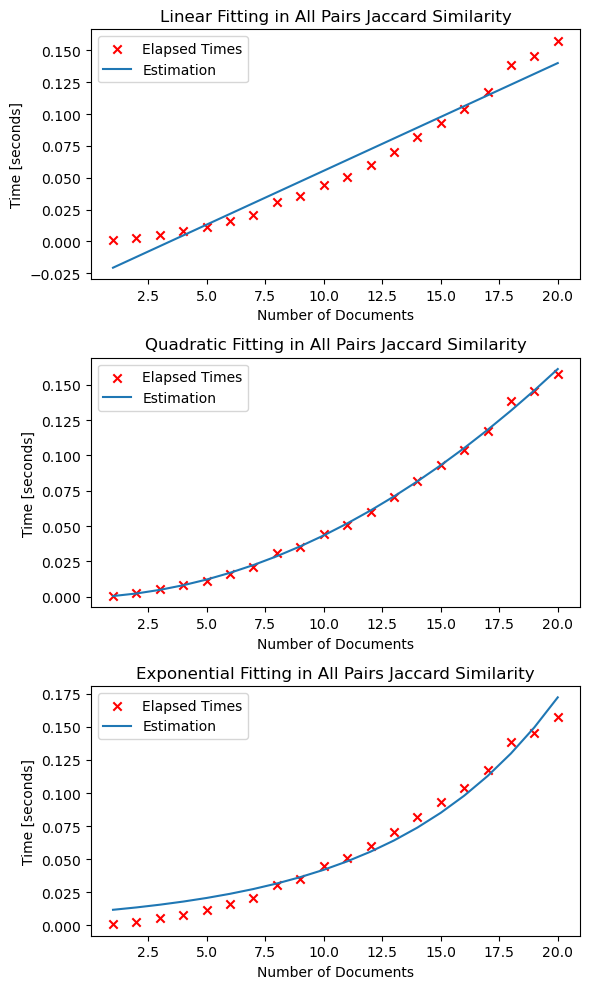

In [120]:
all_jac_estimate_parameters_quad=all_sim_est_graphs(all_pair_number_jaccard,all_pair_time_jaccard,"Jaccard")

By the graphs above, quadratic fitting is the best estimation model for this data points. After this point, all of the calculations were made according to the quadratic fitting.

### Key Constant Calculations:

In [121]:
def alpha_est_eq_quadratic(x, alpha, c0, c1,c2):
    return c0 * x**alpha + c1*x + c2

def alpha_estimation_quadratic(x,y,alpha,c0,c1,c2):
    # Initial guess for parameters
    initial = [alpha,c0,c1,c2]
    # curve fitting to find optimal parameters
    parameters, covariance = curve_fit(alpha_est_eq_quadratic, x, y, p0=initial,maxfev=5000)
    #take the alpha value from the parameters
    alpha_opt = parameters[0]
    print("The alpha value:", alpha_opt)
    return alpha_opt

### Alpha Value:

In [122]:
alpha_all_pair_jac=alpha_estimation_quadratic(all_pair_number_jaccard,all_pair_time_jaccard,2,all_jac_estimate_parameters_quad[0],all_jac_estimate_parameters_quad[1],all_jac_estimate_parameters_quad[2])

The alpha value: 1.8354925646954818


According to the alpha value the time complexity of it is $O(n^{1.84})$, closer to $O(n^{2})$ (expected value). So, the elapsed time depends on the number of the documents with the power of 2 of it.

### Estimation Equation:

In [123]:
print("The equation is: {} x^{:.3f} + {} x + {}".format(all_jac_estimate_parameters_quad[0],alpha_all_pair_jac,all_jac_estimate_parameters_quad[1],all_jac_estimate_parameters_quad[2]))

The equation is: 0.00036921903466524686 x^1.835 + 0.000704665155761397 x + -0.0006402067155757418


Then, I found the equation of the quadratic curve fit. Further elapsed times can be find with this.

In [124]:
def normal_vs_log(x,y,quad_popt,similarity):
    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    #normal estimation
    axs[0].plot(x,quadratic(x,*quad_popt),color='red', label="Estimation")

    axs[0].scatter(x,y,s=5, label="Elapsed Times")
    axs[0].set_title(similarity+" Similarity in All Pairs")
    axs[0].set_xlabel("The Number of Documents")
    axs[0].set_ylabel("The Elapsed Time [seconds]")

    axs[0].legend()


    #logarithmic estimation
    axs[1].plot(log_10(x), log_10(quadratic(x, *quad_popt)), label="Estimation")
    axs[1].scatter(log_10(x),log_10(y),s=5, label="Elapsed Times")
    axs[1].set_title("Logarithmic "+similarity+" Similarity in All Pairs")
    axs[1].set_xlabel("The Number of Words [$\log_{10}$]")
    axs[1].set_ylabel("The Elapsed Time [$\log_{10}$]")
    axs[1].legend()

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()

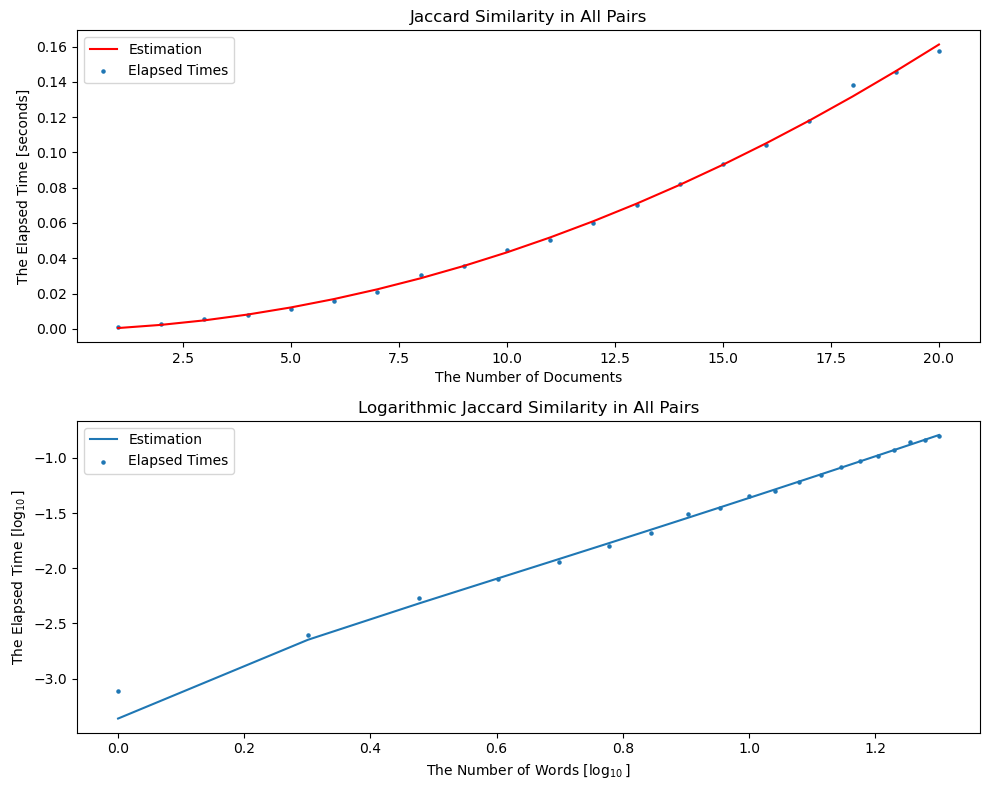

In [125]:
normal_vs_log(all_pair_number_jaccard,all_pair_time_jaccard,all_jac_estimate_parameters_quad,"Jaccard")

## Cosine:

In [126]:
def cos_pair(number_of_documents,num_words,num_iteration_cos):
    times=[]
    for i in range(1,number_of_documents+1):
        for j in range(1,number_of_documents+1):
            if i!=j and j>i:
                
                first_df=df.iloc[:num_words,i-1:i]
                second_df=df.iloc[:num_words,j-1:j]
                
                #converting dataframes to a suitable format which can be used in cosine calculation
                array_first=first_df.values.flatten()
                array_second=second_df.values.flatten()
                
                #there was an error at the last 5%, even if all of them were calculated
                if first_df.empty or second_df.empty:
                    continue
                    
                time_iterate=[]
                for k in range(num_iteration_cos):
                    #starting timer
                    starttime=time.time()
                    
                    #jaccard similarity calculation
                    cos=cosine(array_first,array_second)
                    
                    #ending timer
                    endtime=time.time()
                    
                    #calculating elapsed time
                    timetaken=endtime-starttime
                    #adding elapsed time into a list
                    time_iterate.append(timetaken)
                
                times.append(np.mean(time_iterate))
                
        all_times=sum(times)
    return all_times

In [149]:
def cosine_all_pair_sim_time(number_of_documents,number_of_words,number_of_iteration):
    x=[]
    y=[]
    for i in range(1,number_of_documents+1):
        x.append(i)
        y.append(cos_pair(i,number_of_words,number_of_iteration))
        percentage(i,number_of_documents)
    return np.array(x),np.array(y)

In [150]:
all_pair_number_cosine,all_pair_time_cosine=cosine_all_pair_sim_time(20,2000,20)

5.0% has been completed
10.0% has been completed
15.0% has been completed
20.0% has been completed
25.0% has been completed
30.0% has been completed
35.0% has been completed
40.0% has been completed
45.0% has been completed
50.0% has been completed
60.0% has been completed
65.0% has been completed
70.0% has been completed
75.0% has been completed
80.0% has been completed
85.0% has been completed
90.0% has been completed
95.0% has been completed
100.0% has been completed


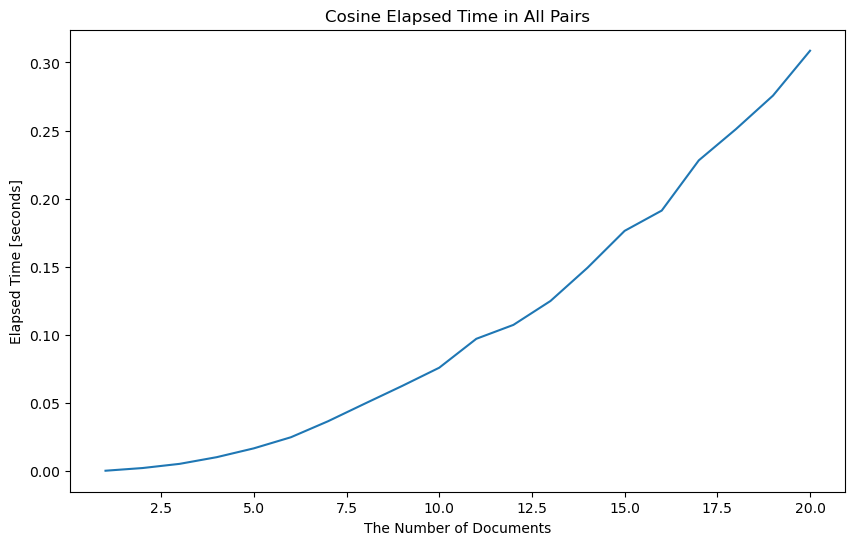

In [151]:
plt.figure(figsize=(10, 6))
plt.title("Cosine Elapsed Time in All Pairs")
plt.xlabel("The Number of Documents")
plt.ylabel("Elapsed Time [seconds]")
plt.plot(all_pair_number_cosine,all_pair_time_cosine)
plt.show()

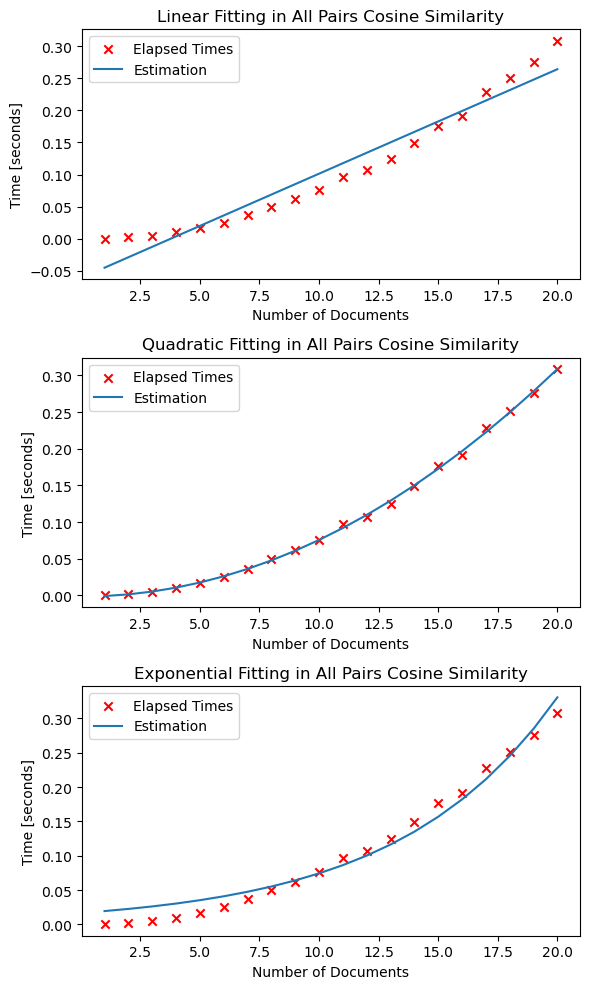

In [152]:
all_cos_estimate_parameters_quad=all_sim_est_graphs(all_pair_number_cosine,all_pair_time_cosine,"Cosine")

### Alpha Value:

In [153]:
alpha_all_pair_jac=alpha_estimation_quadratic(all_pair_number_cosine,all_pair_time_cosine,2,all_cos_estimate_parameters_quad[0],all_cos_estimate_parameters_quad[1],all_cos_estimate_parameters_quad[2])

The alpha value: 1.964280386129589


According to the alpha value the time complexity of it is $O(n^{1.96})$, closer to $O(n^{2})$ (expected value). So, the elapsed time depends on the number of the documents with the power of 2 of it.

### Estimation Equation:

In [154]:
print("The equation is: {} x^{:.3f} + {} x + {}".format(all_cos_estimate_parameters_quad[0],alpha_all_pair_jac,all_cos_estimate_parameters_quad[1],all_cos_estimate_parameters_quad[2]))

The equation is: 0.0007785467071765861 x^1.964 + -7.061691471399456e-05 x + -0.0014469638959253572


C:\Users\Mert\AppData\Local\Temp\ipykernel_10392\3312073465.py:19: RuntimeWarning: invalid value encountered in log10
  alist.append(np.log10(i))


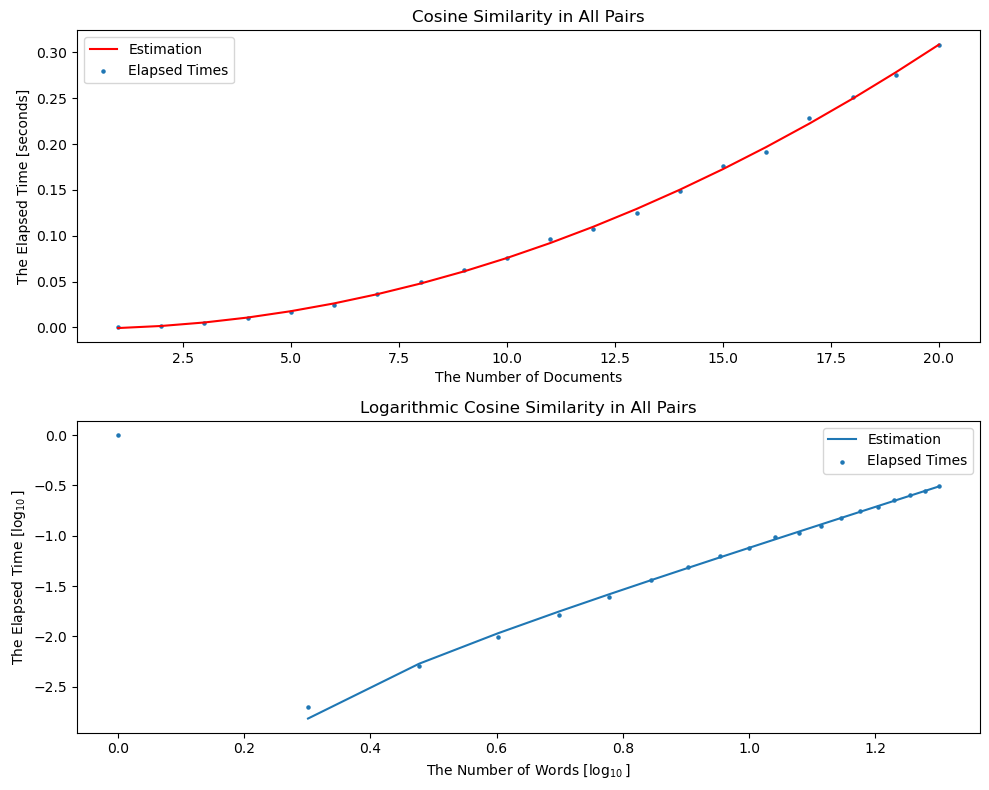

In [155]:
normal_vs_log(all_pair_number_cosine,all_pair_time_cosine,all_cos_estimate_parameters_quad,"Cosine")

### Comparison Results for both Jaccard and Cosine in All Pair Similarities

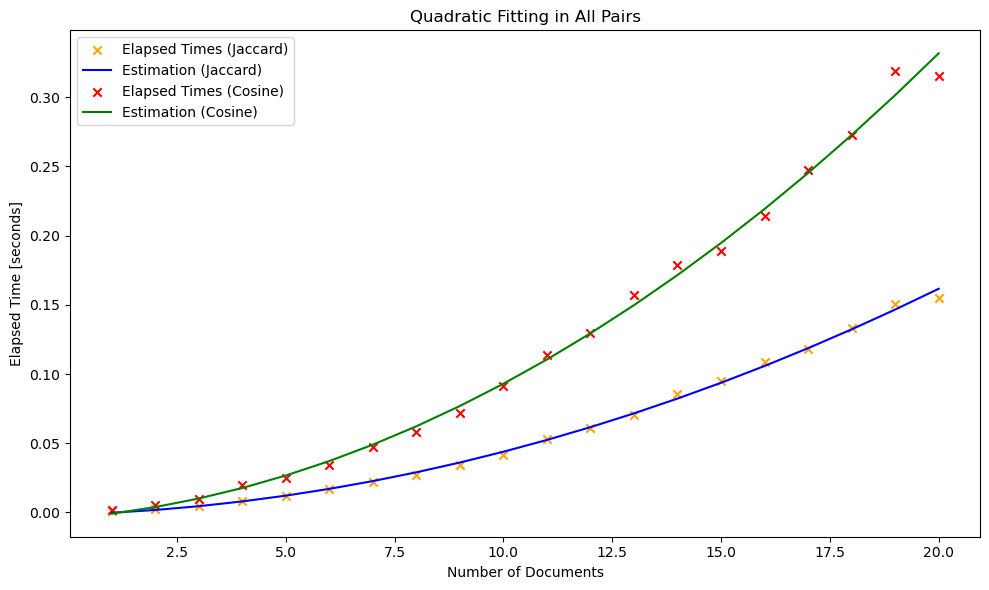

In [75]:
plt.figure( figsize=(10,6))

plt.scatter(all_pair_number_jaccard,all_pair_time_jaccard,marker="x",color="orange",label="Elapsed Times (Jaccard)")
plt.plot(all_pair_number_jaccard,quadratic(all_pair_number_jaccard,all_jac_estimate_parameters_quad[0],all_jac_estimate_parameters_quad[1],all_jac_estimate_parameters_quad[2]),color="blue",label="Estimation (Jaccard)")


plt.scatter(all_pair_number_cosine,all_pair_time_cosine,marker="x",color="red",label="Elapsed Times (Cosine)")
plt.plot(all_pair_number_cosine,quadratic(all_pair_number_cosine,all_cos_estimate_parameters_quad[0],all_cos_estimate_parameters_quad[1],all_cos_estimate_parameters_quad[2]),color="green",label="Estimation (Cosine)")
plt.xlabel("Number of Documents")
plt.ylabel("Elapsed Time [seconds]")



plt.title("Quadratic Fitting in All Pairs")
plt.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

As for the graph related to the comparison of Cosine Similarity with Jaccard Similarity in all pairs, Jaccard works about 2 times faster than the other one when it comes to 20 documents. However, still the Jaccard is not fast when the big data is taken into account. So, even using it for a real-world problem won't be sufficient.

Alpha value of cosine is $O(n^{1.96})$.

Alpha value of jaccard is $O(n^{1.84})$.

# QUESTION 4:

For this question, another py file named MultiprocessFunc was prepared to make it possible.

In [100]:
from multiprocessing import Pool
import time

In [101]:
import MultiprocessFunc

In [102]:
def Multiprocessing(num_repeats, num_processes,num_loops):
    
    a=math.floor(num_repeats/num_processes)
    
    for i in range(a):
    
        inputs=[num_loops]*num_processes
        pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
        pool_of_processes.map(MultiprocessFunc.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
        
        pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.
    
    inputs=[num_loops]*(num_repeats-a*num_processes)
    pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
    pool_of_processes.map(MultiprocessFunc.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
    pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.

In [109]:
times_core=[]

num_repeats=20
for p in range(1,21):
    starttime=time.time()
    
    Multiprocessing(num_repeats,p,1)
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times_core.append(timetaken)
    print("{} takes {:.2f} seconds".format(p,timetaken))

1 takes 17.91 seconds
2 takes 9.49 seconds
3 takes 7.05 seconds
4 takes 5.38 seconds
5 takes 4.71 seconds
6 takes 4.98 seconds
7 takes 4.10 seconds
8 takes 4.32 seconds
9 takes 4.35 seconds
10 takes 3.74 seconds
11 takes 3.67 seconds
12 takes 3.79 seconds
13 takes 4.10 seconds
14 takes 4.10 seconds
15 takes 4.12 seconds
16 takes 4.54 seconds
17 takes 4.39 seconds
18 takes 4.67 seconds
19 takes 4.79 seconds
20 takes 3.92 seconds


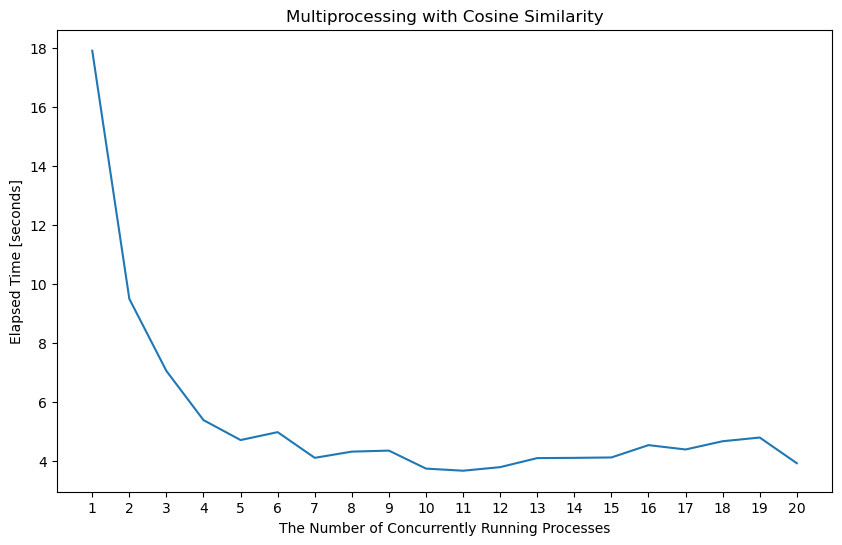

In [110]:
c=[]
for p in range(1,21):
    c.append(p)
    
plt.figure(figsize=(10,6))
plt.plot(c,times_core)
plt.title("Multiprocessing with Cosine Similarity")
plt.xlabel("The Number of Concurrently Running Processes")
plt.ylabel("Elapsed Time [seconds]")
plt.xticks(c)
plt.show()

According to the graph above, it can be made with the 6 cores at the same time. Additionally, when I check the number of my cores from the properties in my laptop, I could see that the number of the cores were 6. That's why the line in the graph decreased until 6 and then it fluctuated around the correspoding elapsed time of 6.

The more multiprocessing, the less time it took.

# QUESTION 5

## Strassen's Method: 

The Strassen's Method reduces the time of matrix multiplication by dividing matrix into quarter pieces each time and then, it performs simple mathematic by adding and subtracting from relevant values. So, this method makes it more efficient in terms of matrix multiplication.

Also, the time complexity of it is expected to be found as $O(n^{2}.m)$.


In [169]:
def naivemult(A, B):
    (m, n) = np.shape(A)
    C = np.zeros([m, m])
    for i in range(m):
        for j in range(m):
            for k in range(m):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [170]:
def segment(M):
    (mm, nn) = np.shape(M)
    n = int(mm/2)

    a = M[:n, :n]
    b = M[:n, n:]
    c = M[n:, :n]
    d = M[n:, n:]

    return (a, b, c, d)


def build(a, b, c, d):
    (mm, nn) = np.shape(a)
    C = np.zeros([2*mm, 2*mm])

    C[:mm, :mm] = a
    C[:mm, mm:] = b
    C[mm:, :mm] = c
    C[mm:, mm:] = d

    return C


def strassen(M1, M2):
    if len(M1) <= 2:
        return naivemult(M1, M2)

    (a, b, c, d) = segment(M1)

    # note: e g f h NOT e f g h
    (e, g, f, h) = segment(M2)

    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d, e)
    P4 = strassen(d, f-e)
    P5 = strassen(a+d, e+h)
    P6 = strassen(b-d, f+h)
    P7 = strassen(a-c, e+g)

    r = P5 + P4 - P2 + P6
    s = P1 + P2
    t = P3 + P4
    u = P5 - P3 - P7 + P1

    C = build(r, s, t, u)

    return C


In [171]:
def from_df_to_square_array(dataframe, square_size):
    #converting from dataframe to array for desired size
    array_df=df.iloc[:square_size,:square_size].values
    
    #calculating how many columns needed to make it square matrix
    missing_size=square_size-array_df.shape[1]
    
    
    #create zero matrix for the remaining columns
    array_zeros=np.zeros((square_size,missing_size))
    
    #concatinating 2 arrays in a horizontal way
    combined_array=np.concatenate((array_df, array_zeros), axis=1)
    
    return combined_array

In [172]:
def similarity_with_strassen(square_matrix,square_size):
    
    #finding strassen matrix multiplication
    strassen_matrix=strassen(square_matrix.transpose(),square_matrix)
    
    #creating an empty matrix to record the similarities
    similarity_matrix=np.zeros((square_size,square_size))
    
    #cosine similarity calculation for the matrix
    for i in range(square_size):
        for j in range(square_size):
            if i == j:
                similarity_matrix[i,j] = 1
            else:
                k1 = strassen_matrix[i,j]
                k2 = strassen_matrix[i,i]
                k3 = strassen_matrix[j,j]
                
                #the condition which prevents the error
                #if the denominator of a matrix is 0, then it must be 0
                if k1==0 or k2==0 or k3==0:
                    similarity_matrix[i,j]=0
                else:
                    similarity_matrix[i,j] = k1/((k2*k3)**(1/2))
    return similarity_matrix
    

In [173]:
def strassen_time(df,square_size,number_of_iteration):
    list_size=[]
    list_time=[]
    for i in square_size:
        list_size.append(i)
        
        square_matrix=from_df_to_square_array(df,i)
        
        alist=[]
        for iteration in range(number_of_iteration):
            #starting timer
            starttime=time.time()

            #smilarity calculation by strassen function created
            similarity_with_strassen(square_matrix,i)

            #ending timer
            endtime=time.time()

            #calculating elapsed time
            timetaken=endtime-starttime
            
            alist.append(timetaken)
            mean=np.mean(alist)
        list_time.append(mean)
        
    return list_size,list_time

In [174]:
#creating a list which contains number the power of 2 for Strassen's Method
square_size=[2**size for size in range(2,9)]

In [175]:
#calculating elapsed times for Strassen's Method
size_strassen,time_strassen=strassen_time(df,square_size,1)

### Key Constant Calculations:

In [176]:
#fitting curve and taking key parameters of the equation
cubic_popt_strassen, _ = curve_fit(cubic,size_strassen,time_strassen)

In [177]:
strassen_estimated_y=[]
for i in size_strassen:
    val=cubic(i,cubic_popt_strassen[0],cubic_popt_strassen[1],cubic_popt_strassen[2],cubic_popt_strassen[3])
    strassen_estimated_y.append(val)

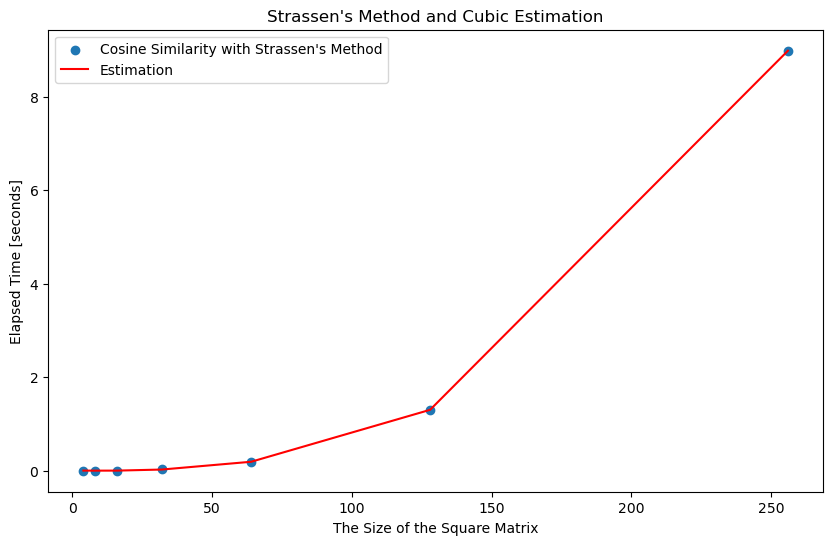

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(size_strassen,time_strassen,label='Cosine Similarity with Strassen\'s Method')
plt.plot(size_strassen,strassen_estimated_y,color='red',label='Estimation')
plt.title("Strassen\'s Method and Cubic Estimation")
plt.xlabel("The Size of the Square Matrix")
plt.ylabel("Elapsed Time [seconds]")
plt.legend()
plt.show()

In [179]:
#alpha estimation for cubic curve
def alpha_est_cubic(x, alpha, a, b, c, d):
    return a * x**alpha + b * x ** 2.0 + c * x + d


def alpha_estimation_cubic(x, y, alpha, a, b, c, d):
    # Initial guess for parameters (alpha, a, b, c)
    initial_guess = [alpha, a, b, c, d]

    # Increase maxfev to allow more function evaluations
    params, covariance = curve_fit(alpha_est_cubic, x, y, p0=initial_guess, maxfev=3000)

    # Extract the alpha value from the optimal parameters
    optimal_alpha = params[0]

    print("Optimal Alpha:", optimal_alpha)
    
    return optimal_alpha 

### Alpha Value:

In [180]:
alpha_strassen=alpha_estimation_cubic(size_strassen,time_strassen, 3, cubic_popt_strassen[0], cubic_popt_strassen[1],cubic_popt_strassen[2], cubic_popt_strassen[3])


Optimal Alpha: 2.6355362953780284


According to the alpha value the time complexity of it is $O(n^{2.63})$, closer to $O(n^{3})$ (expected value), but still far from 3. So, the elapsed time depends on the number of the documents with the power of 3 of it. 

### Estimation Equation:

In [168]:
print("The equation is: {} x^{:.3f} + {} x^2 + {} x + {}".format(cubic_popt_strassen[0],alpha_strassen,cubic_popt_strassen[1],cubic_popt_strassen[2],cubic_popt_strassen[3]))

The equation is: 4.95724848620186e-07 x^2.804 + 2.0245008694475295e-05 x^2 + -0.0002055454161036873 x + 0.0020486786186146994


## Cosine Method:

In [181]:
def cos_pair_q5(df,number_of_documents,num_words,num_iteration_cos):
    times=[]
    for i in range(1,number_of_documents+1):
        for j in range(1,number_of_documents+1):
            if i!=j and j>i:
                
                first_df=df.iloc[:num_words,i-1:i]
                second_df=df.iloc[:num_words,j-1:j]
                
                #converting dataframes to a suitable format which can be used in cosine calculation
                array_first=first_df.values.flatten()
                array_second=second_df.values.flatten()
                
                #there was an error at the last 5%, even if all of them were calculated
                if first_df.empty or second_df.empty:
                    continue
                    
                time_iterate=[]
                for k in range(num_iteration_cos):
                    #starting timer
                    starttime=time.time()
                    
                    #jaccard similarity calculation
                    cos=cosine(array_first,array_second)
                    
                    #ending timer
                    endtime=time.time()
                    
                    #calculating elapsed time
                    timetaken=endtime-starttime
                    #adding elapsed time into a list
                    time_iterate.append(timetaken)
                
                times.append(np.mean(time_iterate))
                
        all_times=sum(times)
    return all_times

In [182]:
def cosine_all_pair_sim_time_q5(df,number_of_documents,number_of_words,number_of_iteration):
    x=[]
    y=[]
    for i in range(1,number_of_documents+1):
        x.append(i)
        y.append(cos_pair_q5(df,i+1,number_of_words,number_of_iteration))
    return np.array(x),np.array(y)

In [183]:
square_size=[2**size for size in range(2,8)]

alist_time=[]
alist_size=[]

for i in square_size:
    
    alist_size.append(i)
    
    square_matrix=from_df_to_square_array(df,i)
    
    square_df=pd.DataFrame(square_matrix)
    
    all_pair_q5,cosine_q5_time=cosine_all_pair_sim_time_q5(square_df,i,i,1)
    
    s=sum(cosine_q5_time)
    
    alist_time.append(s)

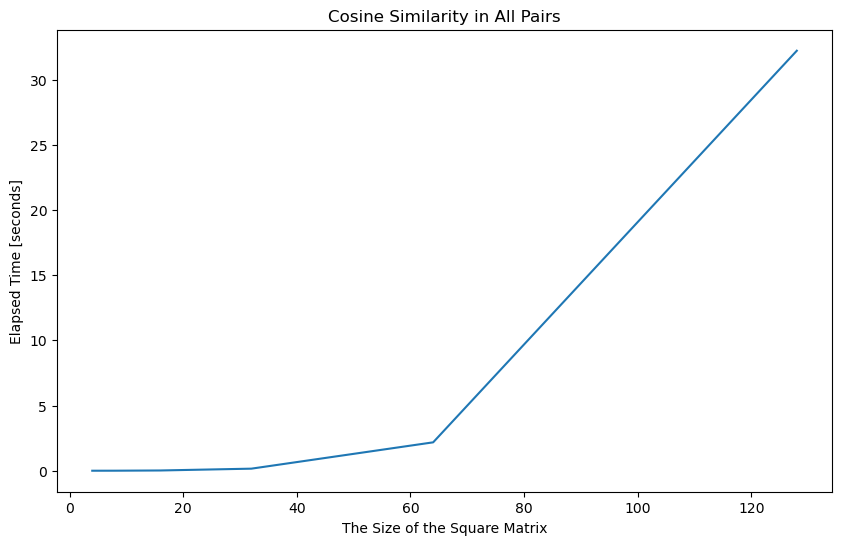

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(alist_size,alist_time)
plt.title("Cosine Similarity in All Pairs")
plt.xlabel("The Size of the Square Matrix")
plt.ylabel("Elapsed Time [seconds]")
plt.show()

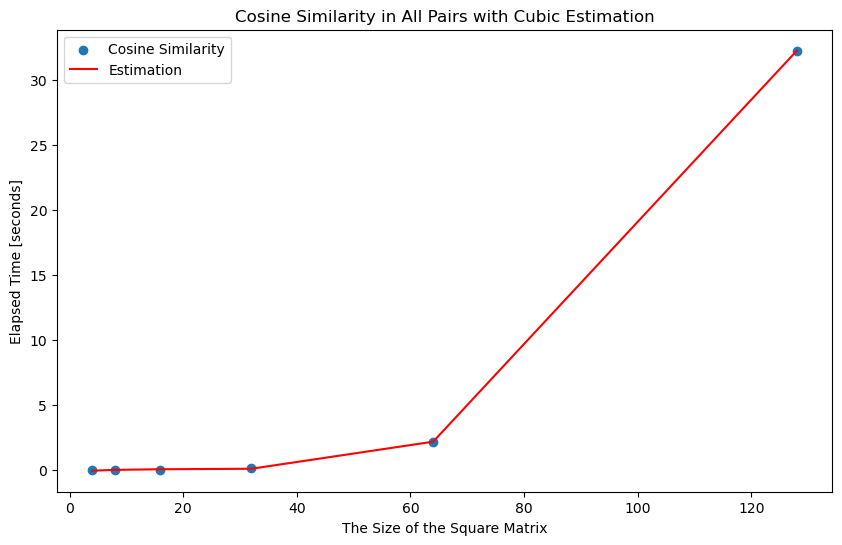

In [185]:
#fitting curve and taking key parameters of the equation
cubic_popt_cosine_q5, _ = curve_fit(cubic,alist_size,alist_time)


cosine_estimated_y_q5=[]
for i in alist_size:
    val=cubic(i,cubic_popt_cosine_q5[0],cubic_popt_cosine_q5[1],cubic_popt_cosine_q5[2],cubic_popt_cosine_q5[3])
    cosine_estimated_y_q5.append(val)
    
plt.figure(figsize=(10, 6))
plt.scatter(alist_size,alist_time,label='Cosine Similarity')
plt.plot(alist_size,cosine_estimated_y_q5,color='red',label='Estimation')
plt.title("Cosine Similarity in All Pairs with Cubic Estimation")
plt.xlabel("The Size of the Square Matrix")
plt.ylabel("Elapsed Time [seconds]")
plt.legend()
plt.show()

### Key Value Calculations:

In [189]:
#alpha estimation for cubic curve
def alpha_est_cubic(x, alpha, a, b, c, d):
    return a * x**alpha + b * x ** 2.0 + c * x + d


def alpha_estimation_cubic(x, y, alpha, a, b, c, d):
    # Initial guess for parameters (alpha, a, b, c)
    initial_guess = [alpha, a, b, c, d]

    # Increase maxfev to allow more function evaluations
    params, covariance = curve_fit(alpha_est_cubic, x, y, p0=initial_guess, maxfev=3000)

    # Extract the alpha value from the optimal parameters
    optimal_alpha = params[0]
    

    print("Optimal Alpha:", optimal_alpha)
    
    return optimal_alpha 

### Alpha Value:

In [190]:
alpha_cosine_q5=alpha_estimation_cubic(alist_size,alist_time, 3, cubic_popt_cosine_q5[0], cubic_popt_cosine_q5[1],cubic_popt_cosine_q5[2], cubic_popt_cosine_q5[3])


Optimal Alpha: 3.2782929201793674


According to the alpha value the time complexity of it is $O(n^{3.27})$, closer to $O(n^{3})$ (expected value), but greater than 3. So, the elapsed time depends on the number of the documents with the power of 3 of it at least.

### Estimation Equation:

In [191]:
print("The equation is: {} x^{:.3f} + {} x^2 + {} x + {}".format(cubic_popt_cosine_q5[0],alpha_cosine_q5,cubic_popt_cosine_q5[1],cubic_popt_cosine_q5[2],cubic_popt_cosine_q5[3]))

The equation is: 2.5948780700329673e-05 x^3.278 + -0.0016019348413278374 x^2 + 0.032744414210360104 x + -0.14731047792919594


### Comparing the Results:

I needed to calculate Strassen's values again because of the length of the data for both. It was taking more in Cosine Similarity, so I made it's size one value smaller in terms of being square of the power of 2.

In [97]:
#calculating elapsed times for Strassen's Method
size_strassen_comparison,time_strassen_comparison=strassen_time(df,square_size,1)

#fitting curve and taking key parameters of the equation
cubic_popt_strassen_comparison, _ = curve_fit(cubic,size_strassen_comparison,time_strassen_comparison)

strassen_estimated_y_comparison=[]
for i in size_strassen_comparison:
    val=cubic(i,cubic_popt_strassen_comparison[0],cubic_popt_strassen_comparison[1],cubic_popt_strassen_comparison[2],cubic_popt_strassen_comparison[3])
    strassen_estimated_y_comparison.append(val)

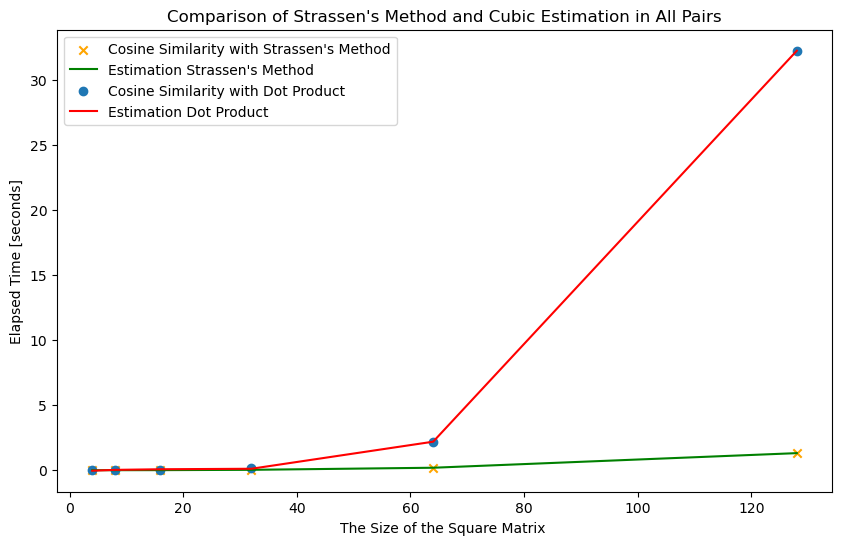

In [192]:
#plotting comparison figure
plt.figure(figsize=(10, 6))

plt.scatter(size_strassen_comparison,time_strassen_comparison,marker="x",color="orange",label='Cosine Similarity with Strassen\'s Method')
plt.plot(size_strassen_comparison,strassen_estimated_y_comparison,color='green',label='Estimation Strassen\'s Method')

plt.scatter(alist_size,alist_time,label='Cosine Similarity with Dot Product')
plt.plot(alist_size,cosine_estimated_y_q5,color='red',label='Estimation Dot Product')

plt.xlabel("The Size of the Square Matrix ")
plt.ylabel("Elapsed Time [seconds]")


plt.title("Comparison of Strassen\'s Method and Cubic Estimation in All Pairs")

plt.legend()
plt.show()

From the graph above it can be seen that the Strassen's Method for matrix multiplication is much more efficient than Cosine Similarity method without a doubt. 

In spite of the requirement of square matrix to use Strassen, 2 matrix can be multiplied to each other in a really shorter time. 

Especially after the size of 64, the elapsed time skyrocketed to near 35 seconds in the size of 128.

The time complexity of cosine similarity with dot product: $O(n^{3.27})$

The time complexity of cosine similarity with Strassen's Method: $O(n^{2.63})$

From the values and the comparison graph above, it's clear that Strassen's Method is a faster algorithm. However, it cannot be applied by taking some part of dataframe directl, so it can make it harder to implement. Also, when it comes to the accuracy of the similarity is a controversial point because of being able to take the exact number of rows from dataframe depended on the power of 2.

# CONCLUSION

As a result, when matrix multiplication is desired to perform, Strassen's matrix multiplication can be used rather than using dot product. Also, Numpy implementation works faster than dot product. Also, similarity calculation for Jaccard doesn't work that much faster than cosine similarity algorithm without numpy. 

Besides that, using more multiprocessor at the same time increases the speed of calculation.

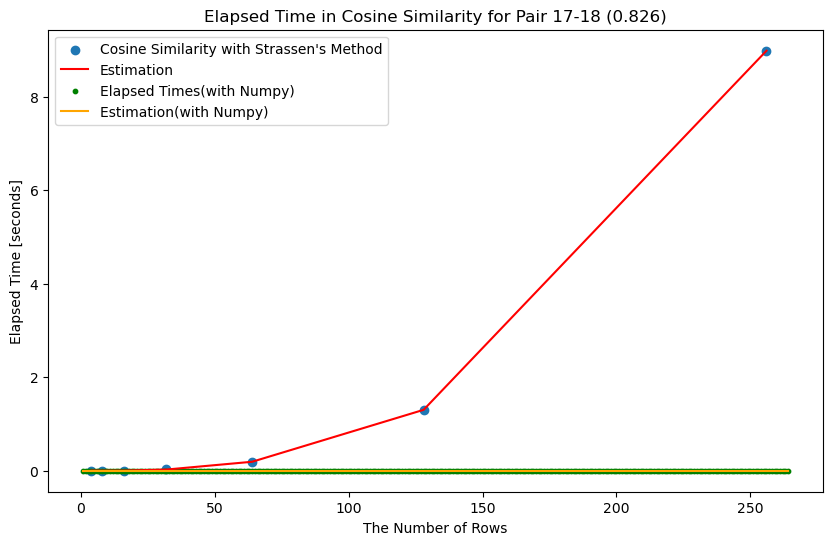

In [199]:
#Comparison of Numpy and Strassen's Method
plt.figure(figsize=(10, 6))
plt.scatter(size_strassen,time_strassen,label='Cosine Similarity with Strassen\'s Method')
plt.plot(size_strassen,strassen_estimated_y,color='red',label='Estimation')
plt.title("Comparison of Strassen'\s Method with Numpy Dot Product")
plt.xlabel("The Number of Rows")
plt.ylabel("Elapsed Time [seconds]")
plt.legend()


plt.scatter(number_cos_numpy[:264],time_cos_numpy[:264],s=10,color='green',label="Elapsed Times(with Numpy)")
plt.plot(number_cos_numpy[:264],cos_estimated_y_numpy[:264], color='orange',label="Estimation(with Numpy)")
plt.title("Elapsed Time in Cosine Similarity for Pair {} ({:.3f})".format(cosine_pair_numpy,cosine_pair_similarity_numpy))

plt.legend()

plt.show()

In conclusion, Numpy dot product with multiprocessing will make it the fastest one among the other algorithms.

In [207]:
import json
import re

def count_words_in_text(text):
    """ Count words in a given text string. """
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def count_words_in_notebook(notebook_path):
    """ Count words in markdown and raw cells of a Jupyter notebook. """
    total_word_count = 0

    with open(notebook_path, 'r', encoding='utf-8') as file:
        notebook = json.load(file)

    for cell in notebook['cells']:
        if cell['cell_type'] in ['markdown', 'raw']:
            text = ''.join(cell['source'])
            total_word_count += count_words_in_text(text)

    return total_word_count

# Example usage
notebook_path = 'C:\\Users\\Mert\\OneDrive - University of Sussex\\Algorithmic Data Science\\Assignment\\Arranged Folder\\277260_Mert_OLCAMAN.ipynb' #My file path
word_count = count_words_in_notebook(notebook_path)
print(f"Total word count (excluding code cells): {word_count}")

Total word count (excluding code cells): 1815


(The parts about estimation were taken from the lab notebooks of the lectures called "Data Science Research Method". Additionally, the algorithms for Cosine Similarity, and Jaccard Similarity, and Strassen's Method were taken from the notebook of this lecture. The code relevant to the word counting was taken one of my friends.)